# **1.1 Load And Explore Data** 

# **EXTERN SSD**

## 1. Load GeoTIFF as NumpyArray

### 1.1 Check python version and load packages

In [9]:
# check current python version and environment
!python --version
!where python 

Python 3.13.0
c:\Users\simon\anaconda3\envs\pyth3130_24\python.exe
C:\Users\simon\AppData\Local\Microsoft\WindowsApps\python.exe


In [10]:
# used python-interpreter
import sys
print(sys.executable)

c:\Users\simon\anaconda3\envs\pyth3130_24\python.exe


In [11]:
# install and import required rasterio package
import rasterio
import rasterio.features
import rasterio.warp

In [12]:
import numpy as np
import matplotlib.pyplot as plt

### 1.2 Load GeoTIFF with Dataset.Reader = src

Example: GeoTIFF of river section 7

In [6]:
# load file path of section 7 GeoTIFF
file_path = r"D:\Drohne\1_OHB\1_OHB_Normalbetrieb\3_OHB_Juli_2024\Outputs\RGB\GeoTIFF\OHB_Abschnitt_07_tight.tif"

In [7]:
# load section 7 GeoTIFF
try:
    with rasterio.open(file_path) as src: # src = stored DatasetReader-object > is able to read raster and meta data 
        A07_raster = src.read()  # reads raster data as NumPy-Array
        A07_profile = src.profile  # meta data like coordinate system, resolution, datatype
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please check the path.")
except rasterio.errors.RasterioIOError as e:
    print(f"Error: Could not open the GeoTIFF file. {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Error: Could not open the GeoTIFF file. D:\Drohne\1_OHB\1_OHB_Normalbetrieb\3_OHB_Juli_2024\Outputs\RGB\GeoTIFF\OHB_Abschnitt_07_tight.tif: No such file or directory


### 1.3 Check properties of the NumpyArray

In [8]:
# print shape and data type of Numpy.ndarray
A07_raster.shape, A07_raster.dtype, type(A07_raster)

NameError: name 'A07_raster' is not defined

In [ ]:
print(A07_raster)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
# coordinate system
crs = src.crs
print(crs)

# geographical extent of the data (bounding box)
print(src.bounds)

# meta data
# print(A07_profile)

EPSG:4326
BoundingBox(left=11.305672909358805, bottom=48.73998819656813, right=11.307350050238805, top=48.74128370399813)


### 1.4 Plot Image with matplotlib

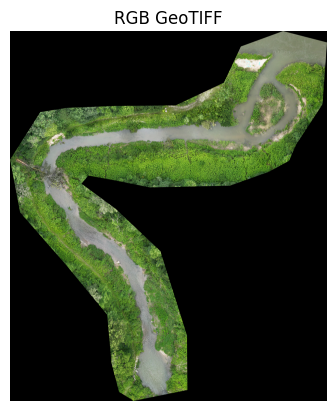

In [ ]:
# Plot RGB image of section 7
if A07_raster.shape[0] >= 3:  # check if 3 bands exist (first 3 bands are RGB)
    rgb_image = A07_raster[:3].transpose(1, 2, 0)  # transpose bands for RGB depiction
    plt.imshow(rgb_image)
    plt.title("RGB GeoTIFF")
    plt.axis('off')  # turn off axis representation
    plt.show()
else:
    print("GeoTIFF has less than three bands")

### 1.5 Check spatial properties of the image and crs

In [ ]:
# spatial position of the upper left corner of the data
transform = src.transform
upper_left = transform * (0, 0)
print("Upper left corner:", upper_left)

Upper left corner: (11.305672909358805, 48.74128370399813)


In [ ]:
# lower right corner
width = src.width
height = src.height
print("Width:", width)
print("Height:", height)

lower_right = transform * (width - 1, height - 1)
print("Lower right corner:", lower_right)

Width: 5140
Height: 6003
Lower right corner: (11.307349723946805, 48.739988412378125)


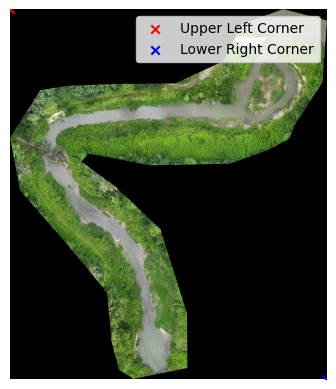

In [ ]:
# plot rgb image with lower right and upper left corner highlighted
plt.imshow(rgb_image)

# marker for upper left corner
plt.scatter(0, 0, color='red', marker='x', label="Upper Left Corner")
# marker for lower right corner
plt.scatter(width-1, height-1, color='blue', marker='x', label="Lower Right Corner")

plt.legend()
plt.axis('off')
plt.show()

### 1.6 Indexing on an NumpyArray

In [ ]:
# band 1
A07_raster[0]
# band 2
A07_raster[1]
#...
# band 4
A07_raster[3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
A07_raster.shape

(4, 6003, 5140)

In [ ]:
# single specific pixel value in band 1 (red band)
A07_raster[0, 1000, 2500]

np.uint8(0)

## 2. Spatial Indexing

In [ ]:
# get the value for the pixel ??m east and ??m south of the dataset's upper left corner
x_0, y_0 = (src.bounds.left, src.bounds.top)
print(f"Upper left corner at ({x_0}, {y_0})")

x, y = (src.bounds.left + 0.00018, src.bounds.top - 0.00035)
# row, col = src.index(x,y)
# print(row, col)
# A07_raster[0, row, col]

if src.bounds.left <= x <= src.bounds.right and src.bounds.bottom <= y <= src.bounds.top:
        # calculate the pixel coordinates for (x, y) in GeoTIFF
        row, col = src.index(x, y)
        print(f"Row: {row}, Column: {col}")

        # pixel value for these coordinates in the first band
        pixel_value = A07_raster[0, row, col]
        print(f"Pixel Value at ({x}, {y}):", pixel_value)
else:
        print("Coordinates out of raster boundary")

Upper left corner at (11.305672909358805, 48.74128370399813)
Row: 1621, Column: 551
Pixel Value at (11.305852909358805, 48.74093370399813): 137


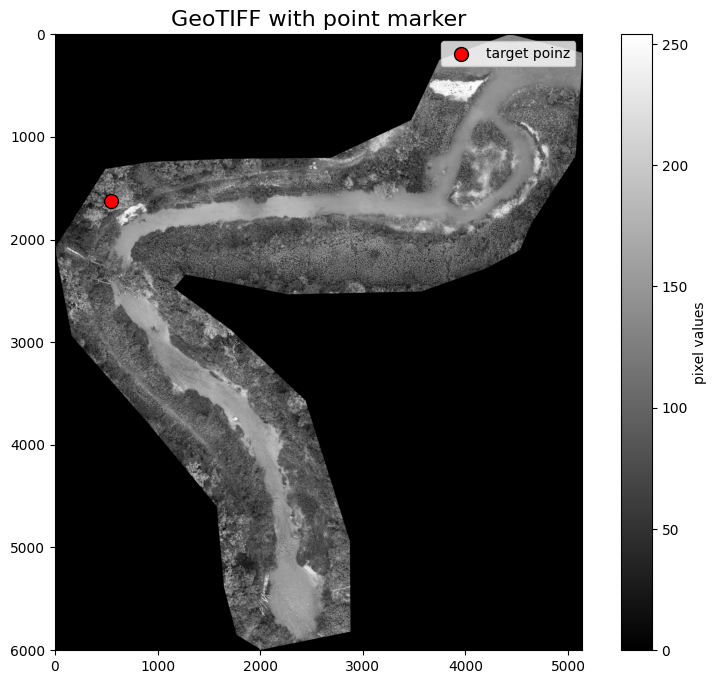

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(A07_raster[0], cmap="gray")  
plt.colorbar(label="pixel values")
plt.title("GeoTIFF with point marker", fontsize=16)

if row is not None and col is not None:
    plt.scatter(col, row, color="red", label="target poinz", edgecolor="black", s=100)
    plt.legend()

plt.show()

In [ ]:
# Longitude distance
delta_x = x - x_0
# Latitude distance
delta_y = y - y_0
delta_x, delta_y

(0.00018000000000029104, -0.00034999999999740794)

## 3. Load and examine Labels

### 3.1 Number of elements per class

In [ ]:
# !pip install pandas
import pandas as pd

In [ ]:
# number of elements per class
labels_csv = pd.read_csv(r"C:\Users\simon\Meine Ablage\Dokumente.GD\FS06 SS24\BACHELORARBEIT\MoSE\data\shapefiles\labels_adjusted.csv")
class_counts = labels_csv["Elementtyp"].value_counts()
class_counts

Elementtyp
Totholz              1247
Einzelstein           124
Wurzelstock           102
Schotterbank           30
Sand_Schlammbank       29
Steinriegel             5
Schlamm_Sandinsel       4
Steinverbauung          3
Schotterinsel           3
Name: count, dtype: int64

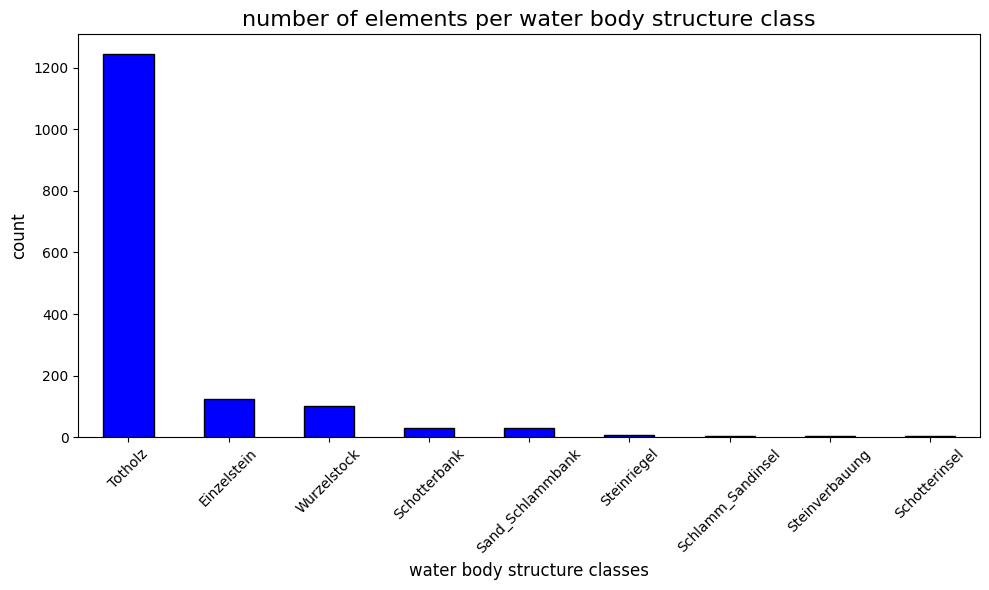

In [ ]:
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title("number of elements per water body structure class", fontsize=16)
plt.xlabel("water body structure classes", fontsize=12)
plt.ylabel("count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

### 3.2 Size of summarized area per class

In [ ]:
# !pip install geopandas
import geopandas as gpd

In [ ]:
shapefile_path = r"C:\Users\simon\Meine Ablage\Dokumente.GD\FS06 SS24\BACHELORARBEIT\MoSE\data\shapefiles\GSK_24_WGS84_adjusted.shp"
labels_shp = gpd.read_file(shapefile_path)
# labels_shp

In [ ]:
labels_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# areas of the labels 
labels_shp["AREA_m2_2"] 

0        0.858
1        2.544
2        2.133
3        1.095
4        0.813
         ...  
1546     0.168
1547     2.076
1548     6.165
1549     4.299
1550    17.182
Name: AREA_m2_2, Length: 1551, dtype: float64

In [ ]:
# add/sum up area per class labels 
area_per_class = labels_shp.groupby("Elementtyp")["AREA_m2_2"].sum()
# area_per_class_2 = class_labels_shp_metric.groupby("Elementtyp")["s_area_m2_metric"].sum()

# sort the classes in descending order
area_per_class = area_per_class.sort_values(ascending=False)
# area_per_class_2 = area_per_class_2.sort_values(ascending=False)
area_per_class #, area_per_class_2

Elementtyp
Totholz              2539.215
Schotterbank          967.010
Sand_Schlammbank      628.200
Wurzelstock           205.957
Schotterinsel         132.862
Schlamm_Sandinsel     107.283
Einzelstein            54.531
Steinriegel            22.387
Steinverbauung          3.747
Name: AREA_m2_2, dtype: float64

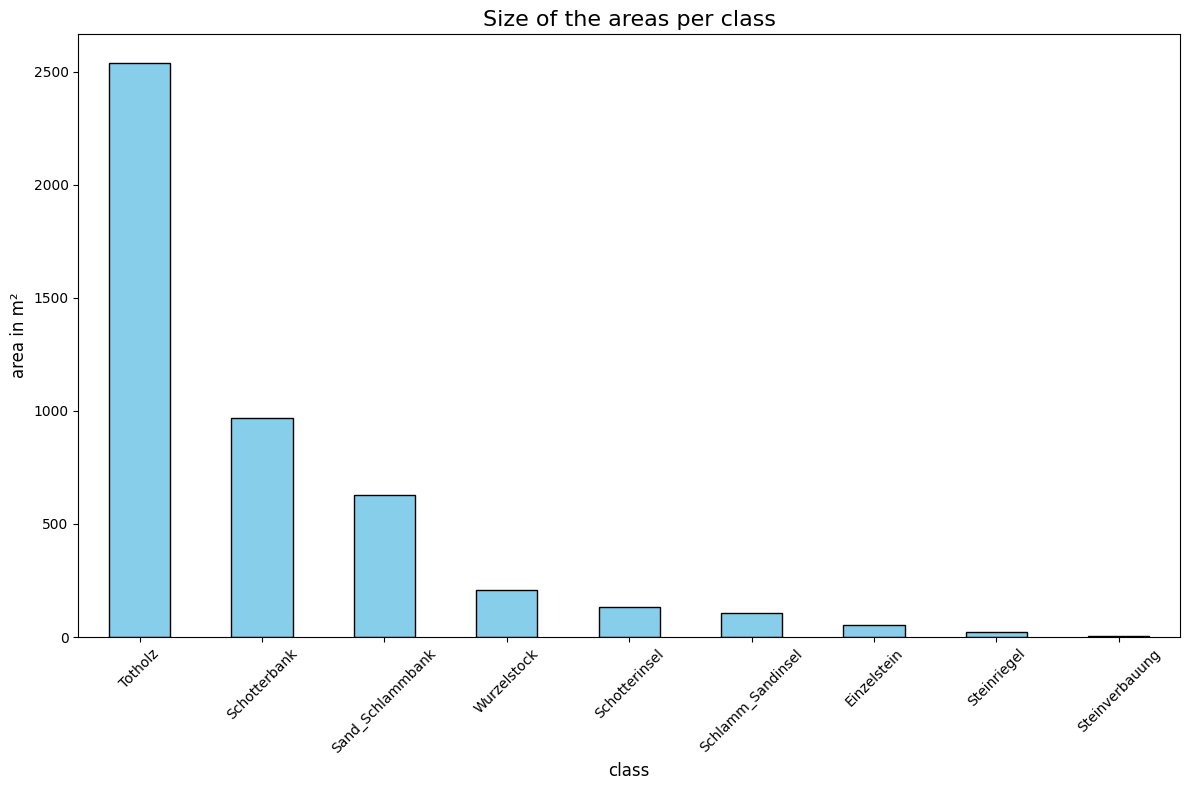

In [ ]:
# area values with old crs
plt.figure(figsize=(12, 8))
area_per_class.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Size of the areas per class", fontsize=16)
plt.xlabel("class", fontsize=12)
plt.ylabel("area in m²", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.3 Compare areas and numbers of labels per class

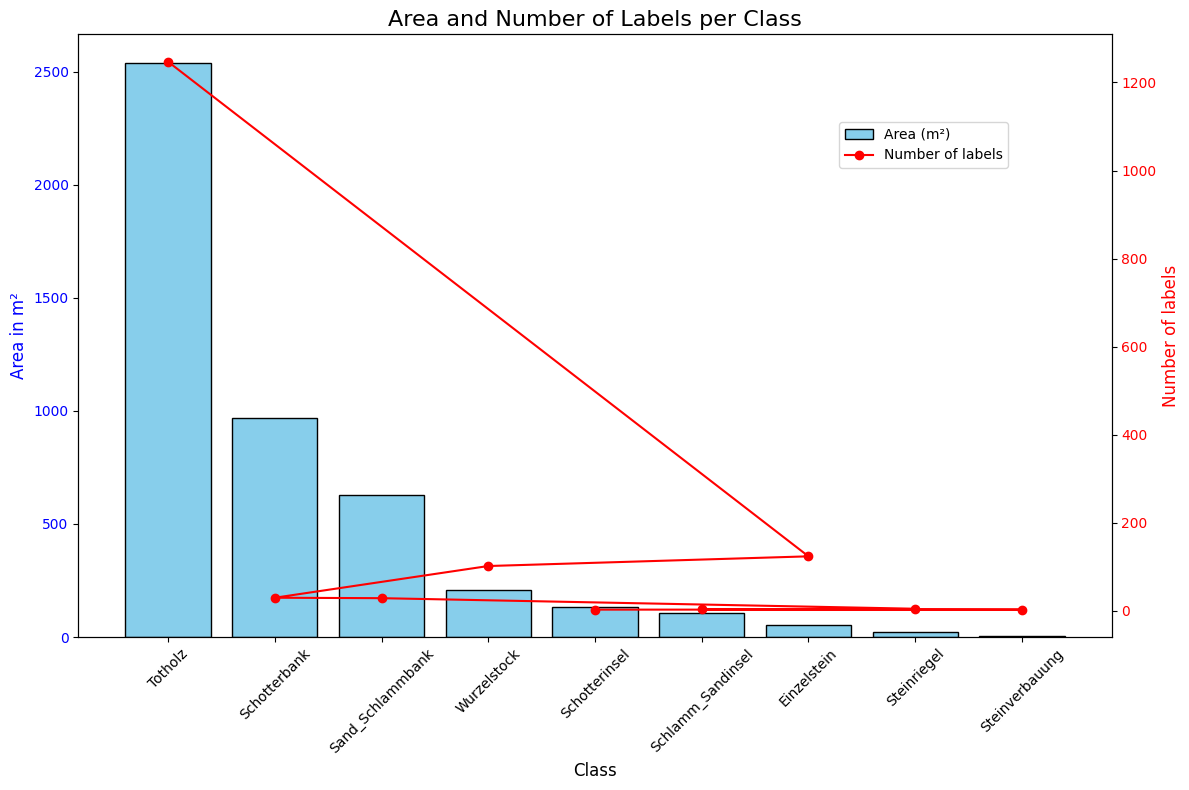

In [ ]:
# ax1 = primary axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# area per class on axis "ax1"
ax1.bar(area_per_class.index, area_per_class.values, color="skyblue", edgecolor="black", label="Area (m²)")
ax1.set_xlabel("Class", fontsize=12)
ax1.set_ylabel("Area in m²", fontsize=12, color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.tick_params(axis="x", rotation=45)
ax1.set_title("Area and Number of Labels per Class", fontsize=16)

# number of labels per class on secondary axis "ax2"
ax2 = ax1.twinx()
ax2.plot(class_counts.index, class_counts.values, color="red", marker="o", label="Number of labels")
ax2.set_ylabel("Number of labels", fontsize=12, color="red")
ax2.tick_params(axis="y", labelcolor="red")

# add legend
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.85))

# optimize layout
plt.tight_layout()
plt.show()


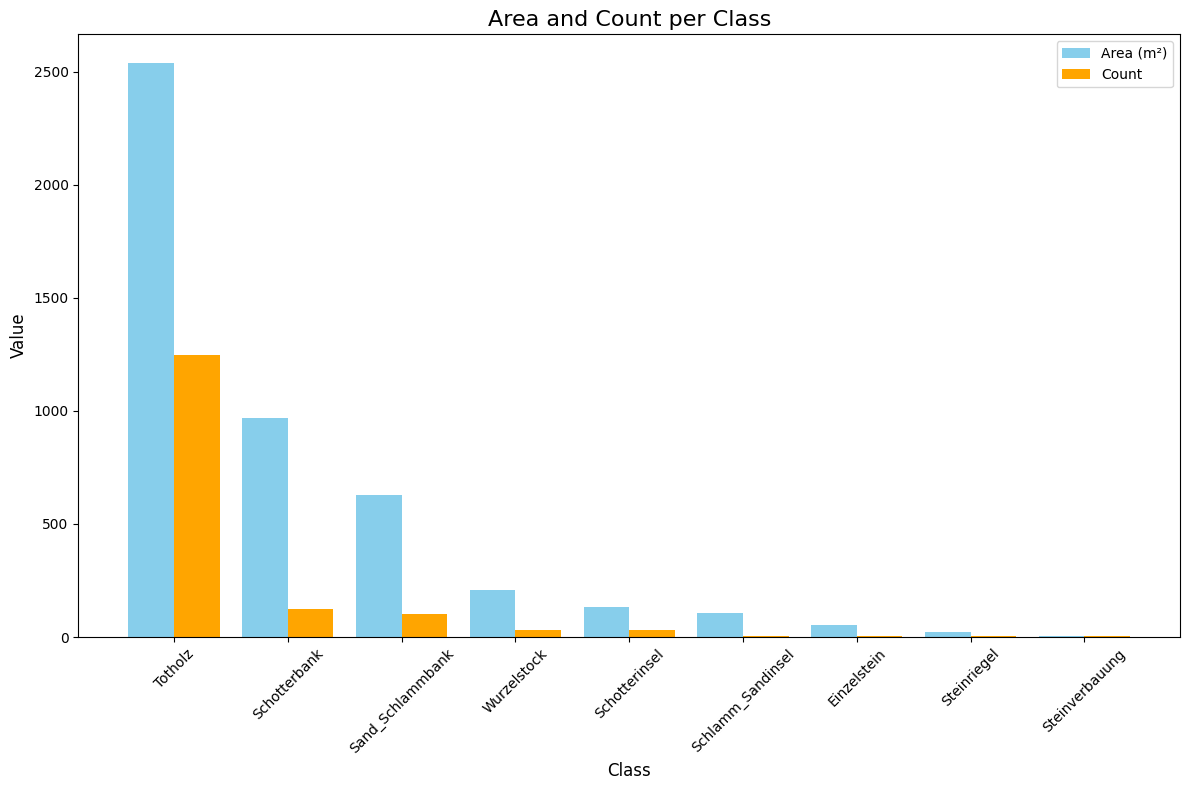

In [ ]:
import numpy as np

# prepare data
classes = area_per_class.index
x = np.arange(len(classes))  # positions of the classes on the x-axis
width = 0.4  # width of the bars

# joint diagram
fig, ax = plt.subplots(figsize=(12, 8))

# bars for the area per classes (left)
ax.bar(x - width / 2, area_per_class.values, width, color="skyblue", label="Area (m²)")

# bars for the counts of labels per classes (right)
ax.bar(x + width / 2, class_counts.values, width, color="orange", label="Count")

# axis title and descriptions
ax.set_xlabel("Class", fontsize=12)
ax.set_ylabel("Value", fontsize=12)
ax.set_title("Area and Count per Class", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45)

# add legend
ax.legend()

plt.tight_layout()
plt.show()


### 3.4 Filter classes

In [ ]:
# Remove labels without class assignment
labels_filtered = labels_shp[labels_shp["Elementtyp"].notnull()]

# Exclude classes with not enough or too small labels
exclude_classes = ['Einzelstein', 'Steinverbauung', 'Steinriegel', 'Schlamm_Sandinsel', 'Schotterinsel']
labels_filtered = labels_filtered[~labels_filtered["Elementtyp"].isin(exclude_classes)]

print("4 classes (without background class): ", labels_filtered["Elementtyp"].unique())

4 classes (without background class):  ['Wurzelstock' 'Totholz' 'Schotterbank' 'Sand_Schlammbank']


In [ ]:
class_counts_filt = labels_filtered["Elementtyp"].value_counts()
class_counts_filt

Elementtyp
Totholz             1246
Wurzelstock          102
Schotterbank          30
Sand_Schlammbank      29
Name: count, dtype: int64

In [ ]:
# add/sum up area per class labels 
area_per_class_filt = labels_filtered.groupby("Elementtyp")["AREA_m2_2"].sum()

# sort the classes in descending order
area_per_class_filt = area_per_class_filt.sort_values(ascending=False)
area_per_class_filt

Elementtyp
Totholz             2539.215
Schotterbank         967.010
Sand_Schlammbank     628.200
Wurzelstock          205.957
Name: AREA_m2_2, dtype: float64

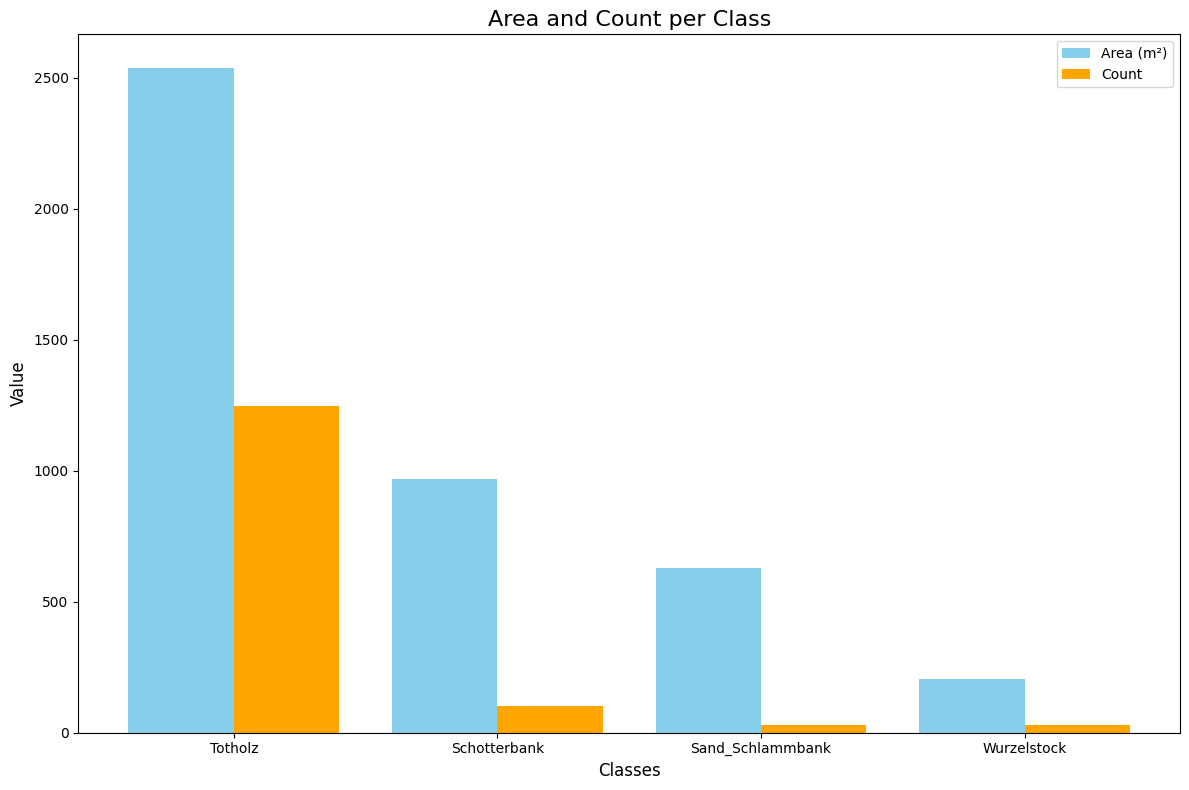

In [ ]:
import numpy as np

# prepare data
classes = area_per_class_filt.index
x = np.arange(len(classes))  # positions of the classes on the x-axis
width = 0.4  # width of the bars

# joint diagram
fig, ax = plt.subplots(figsize=(12, 8))

# bars for the area per classes (left)
ax.bar(x - width / 2, area_per_class_filt.values, width, color="skyblue", label="Area (m²)")

# bars for the counts of labels per classes (right)
ax.bar(x + width / 2, class_counts_filt.values, width, color="orange", label="Count")

# axis title and descriptions
ax.set_xlabel("Classes", fontsize=12)
ax.set_ylabel("Value", fontsize=12)
ax.set_title("Area and Count per Class", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=0)

# add legend
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# size of areas per class 
plt.figure(figsize=(12, 8))
area_per_class_filt.plot(kind="bar", color="skyblue")
plt.title("Size of the areas per class", fontsize=16)
plt.xlabel("class", fontsize=12)
plt.ylabel("area in m²", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

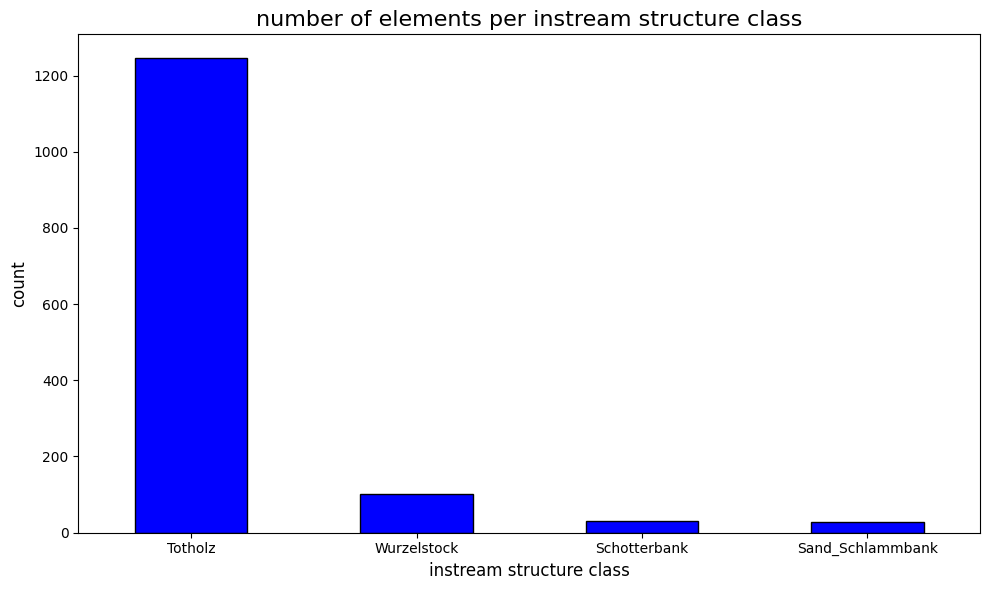

In [ ]:
# number of elements per class
plt.figure(figsize=(10, 6))
class_counts_filt.plot(kind='bar', color='blue', edgecolor='black')
plt.title("number of elements per instream structure class", fontsize=16)
plt.xlabel("instream structure class", fontsize=12)
plt.ylabel("count", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout() 
plt.show()